# 9th April live Class Review Scrapper

* open in pycharm



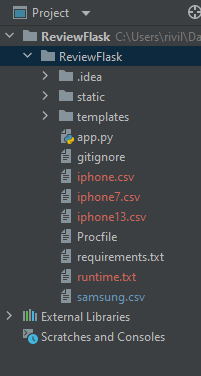


* install all the dependencies, make sure to put them into a file

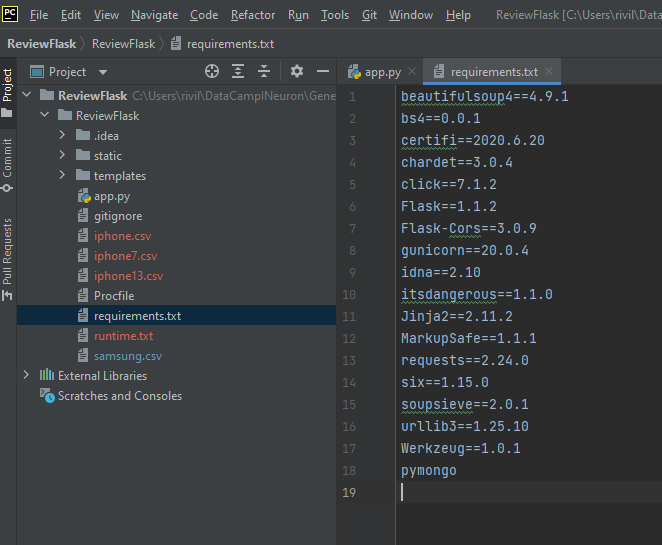

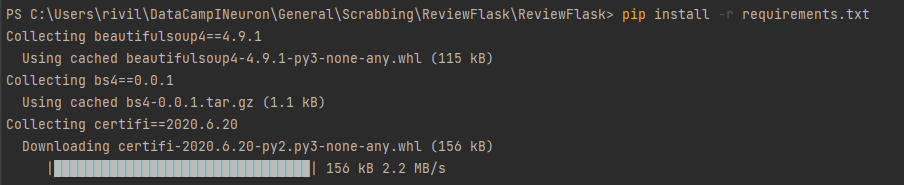

1. go to a website
2. search for a product
3. locate a rewiew part
4. scrap all the data into the local system

In [1]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

* searching for specific class: this specific class is found manually the first time and provides the results in a list

bigboxes = flipkart_html.findAll("div", {"class": "_1AtVbE col-12-12"})

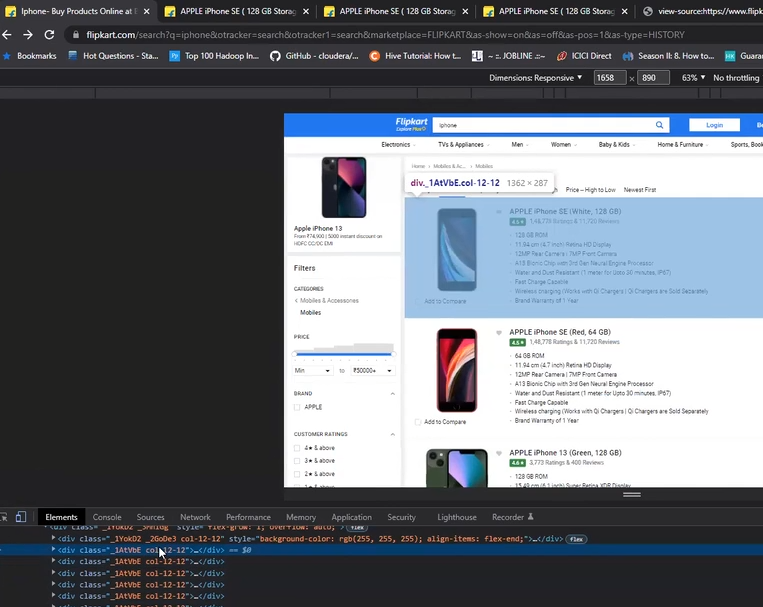


* extracting the info from a specific comment box inside of an html paragraph

name = commentbox.div.div.find_all('p', {'class': '_2sc7ZR _2V5EHH'})[0].text

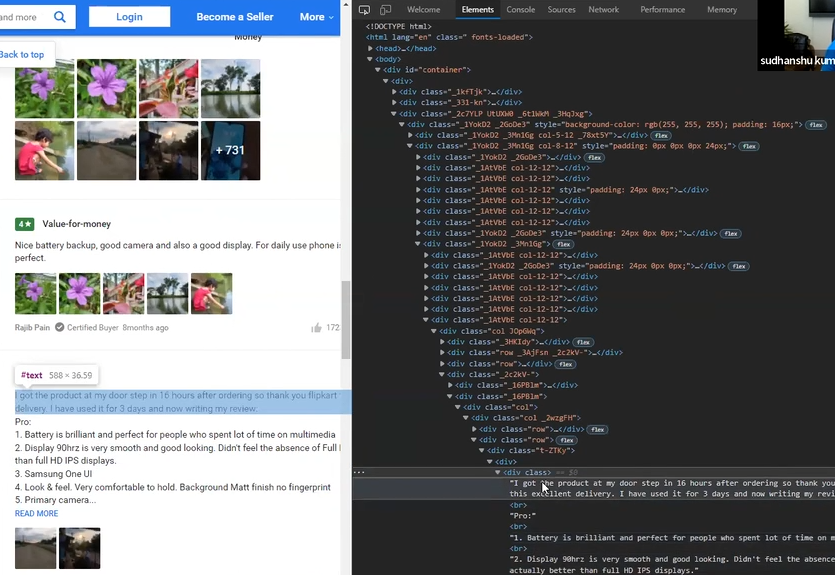

* to access rating

rating = commentbox.div.div.div.div.text

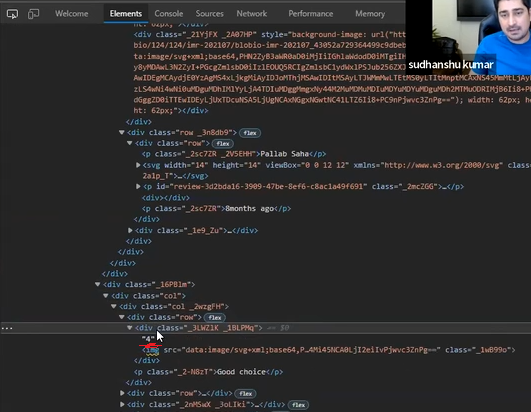



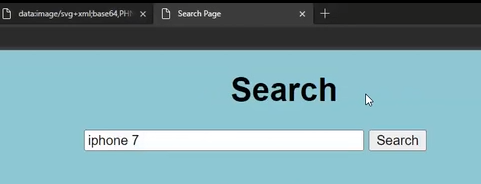

* samsung reviews in this case:

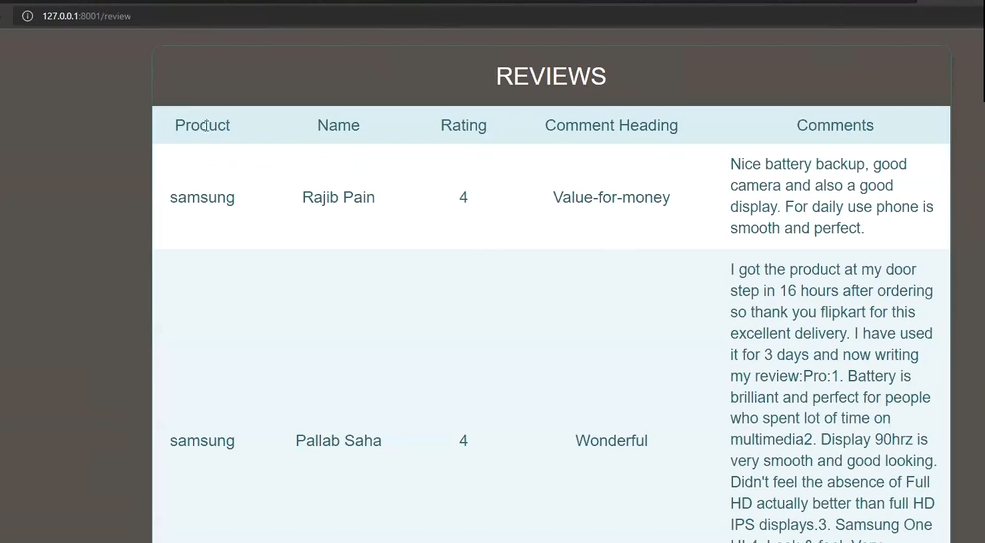

* INDEX HTML

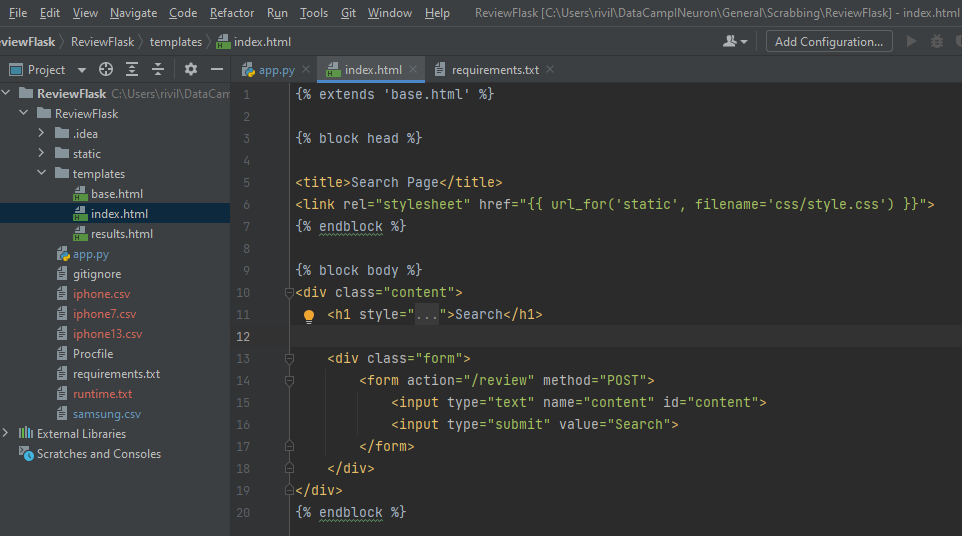

### @cross_origin()

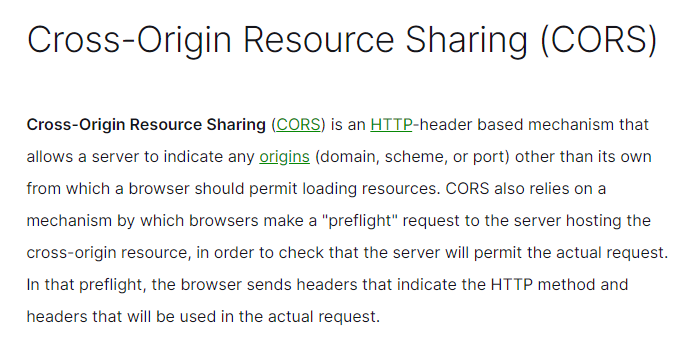

# ENTIRE CODE

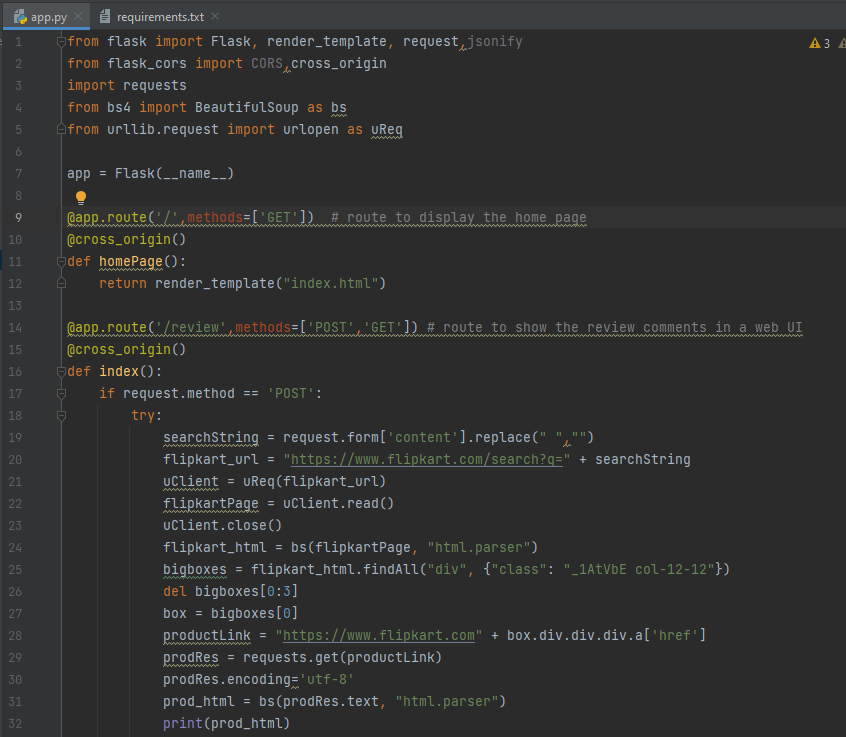

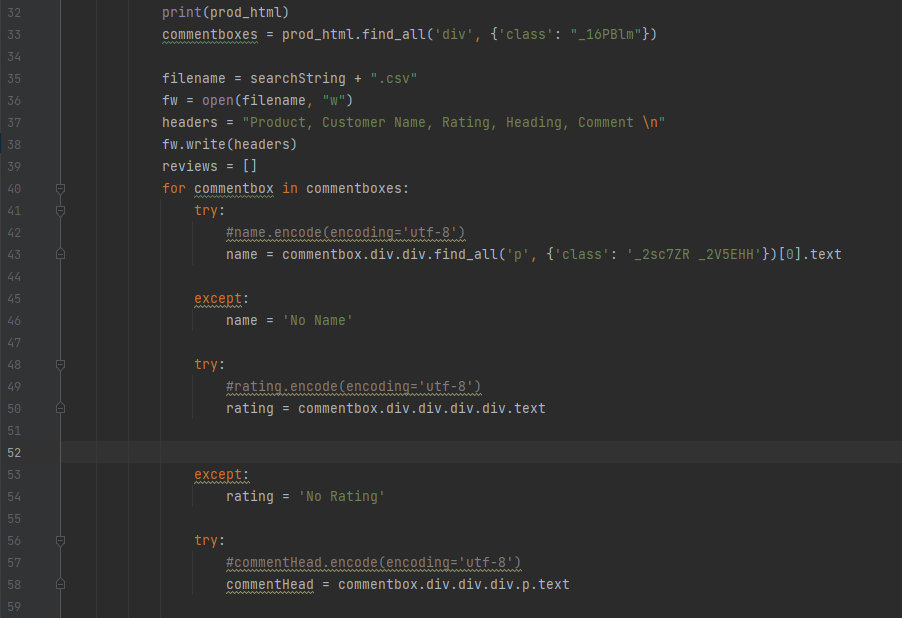

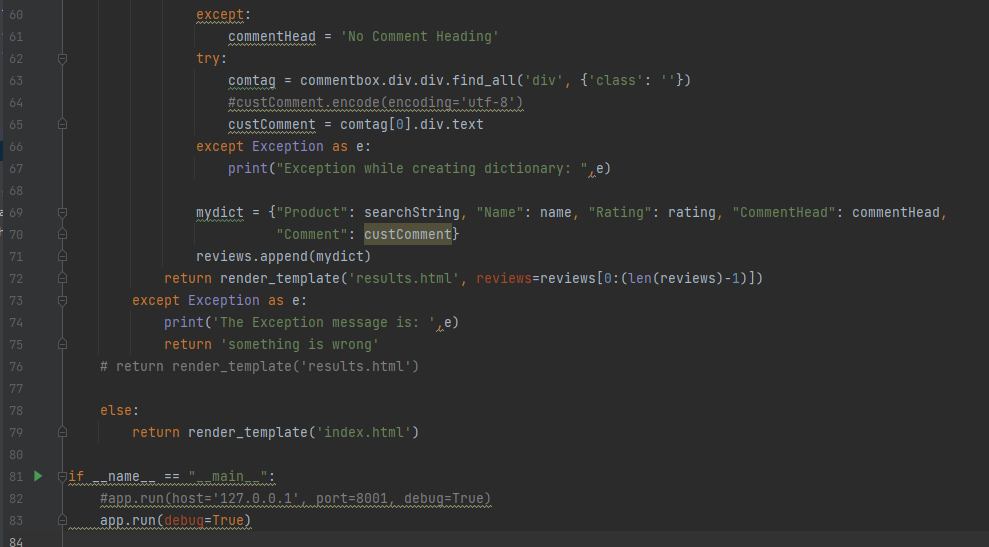

In [ ]:
# APP.PY
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

app = Flask(__name__)

@app.route('/',methods=['GET'])  # route to display the home page
@cross_origin()       # allows a server to indicate any origins
def homePage():
    return render_template("index.html")

@app.route('/review',methods=['POST','GET']) # route to show the review comments in a web UI
@cross_origin()
def index():
    if request.method == 'POST':
        try:
            searchString = request.form['content'].replace(" ","")
            flipkart_url = "https://www.flipkart.com/search?q=" + searchString
            uClient = uReq(flipkart_url)                                  # library imported, opens an url
            flipkartPage = uClient.read()                                 # reads the info
            uClient.close()
            flipkart_html = bs(flipkartPage, "html.parser")               # library imported, better structure to read
            bigboxes = flipkart_html.findAll("div", {"class": "_1AtVbE col-12-12"})   # finds  class, outputs a list
            del bigboxes[0:3]
            box = bigboxes[0]
            productLink = "https://www.flipkart.com" + box.div.div.div.a['href']  # extracts url from specific position
            prodRes = requests.get(productLink)                                   # gets the info from an url
            prodRes.encoding='utf-8'
            prod_html = bs(prodRes.text, "html.parser")      # better structure of the info within the specific url
            print(prod_html)
            commentboxes = prod_html.find_all('div', {'class': "_16PBlm"})   # find the class for reviews

            filename = searchString + ".csv"       # opens a file to save the info collected
            fw = open(filename, "w")
            headers = "Product, Customer Name, Rating, Heading, Comment \n"
            fw.write(headers)
            reviews = []
            for commentbox in commentboxes:
                try:
                    #name.encode(encoding='utf-8')
                    name = commentbox.div.div.find_all('p', {'class': '_2sc7ZR _2V5EHH'})[0].text  # extract name

                except:
                    name = 'No Name'

                try:
                    #rating.encode(encoding='utf-8')
                    rating = commentbox.div.div.div.div.text


                except:
                    rating = 'No Rating'

                try:
                    #commentHead.encode(encoding='utf-8')
                    commentHead = commentbox.div.div.div.p.text

                except:
                    commentHead = 'No Comment Heading'
                try:
                    comtag = commentbox.div.div.find_all('div', {'class': ''})
                    #custComment.encode(encoding='utf-8')
                    custComment = comtag[0].div.text
                except Exception as e:
                    print("Exception while creating dictionary: ",e)

                mydict = {"Product": searchString, "Name": name, "Rating": rating, "CommentHead": commentHead,
                          "Comment": custComment}
                reviews.append(mydict)
            return render_template('results.html', reviews=reviews[0:(len(reviews)-1)])
        except Exception as e:
            print('The Exception message is: ',e)
            return 'something is wrong'
    # return render_template('results.html')

    else:
        return render_template('index.html')

if __name__ == "__main__":
    #app.run(host='127.0.0.1', port=8001, debug=True)
	app.run(debug=True)


# DEPLOYEMENT

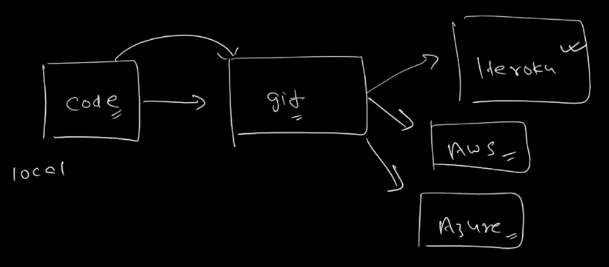

# HEROKU

* Create a new corresponding depository in git

* initialize git.init in the folder where your code is located

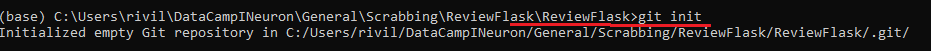

* login to heroku

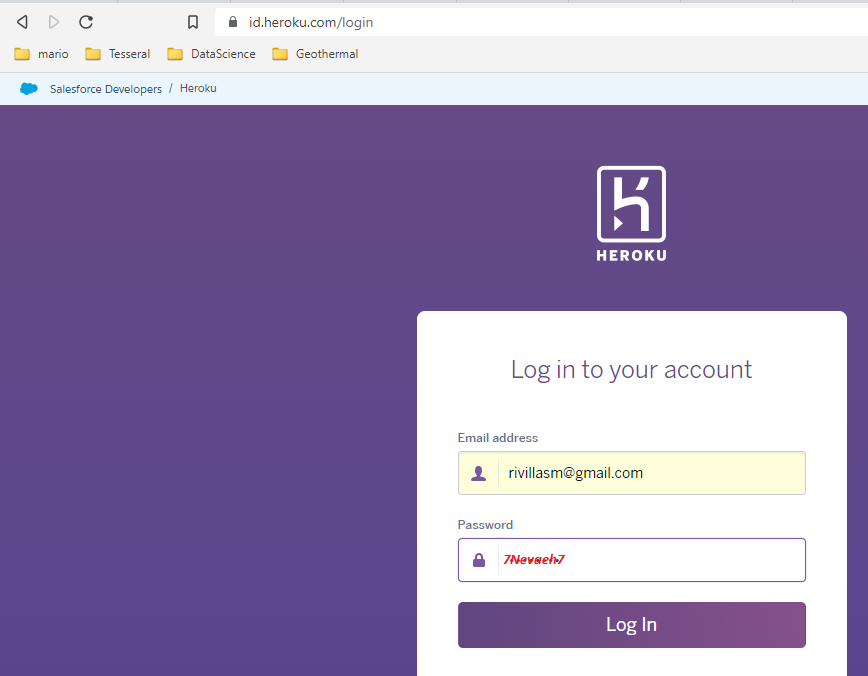
* once login create a new project and give it a name

* now move your code into github by following the steps given in github

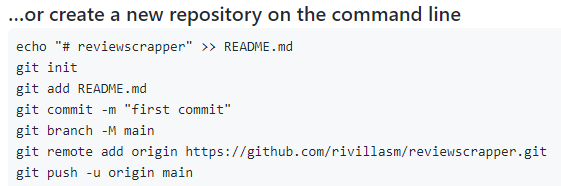

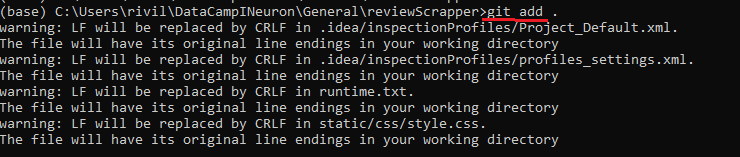

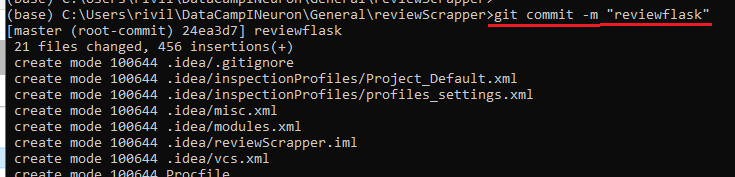

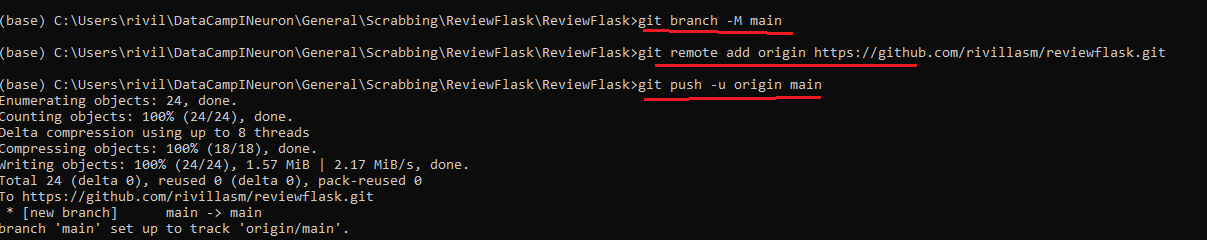

* connect to github

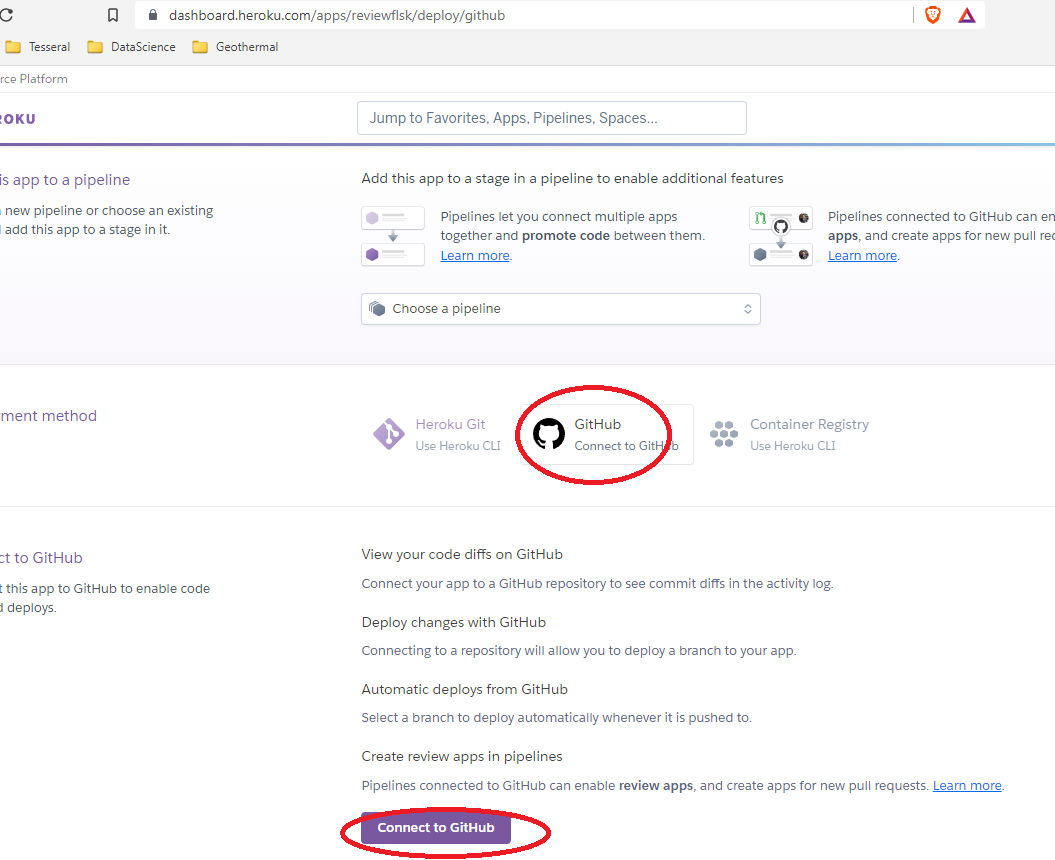

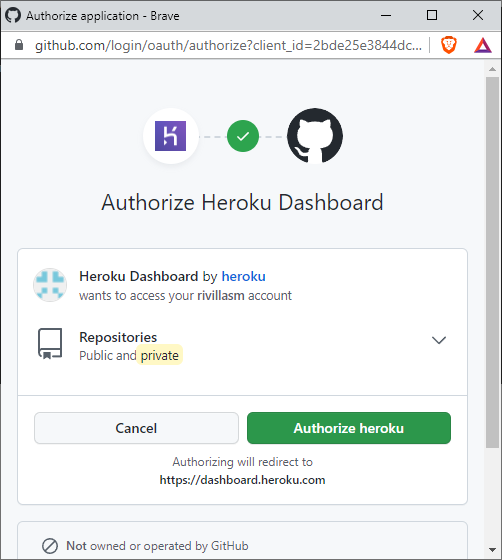

* you can choose to use github(requires upload to github first but is more automatic) or heroku(requires manually command lines)

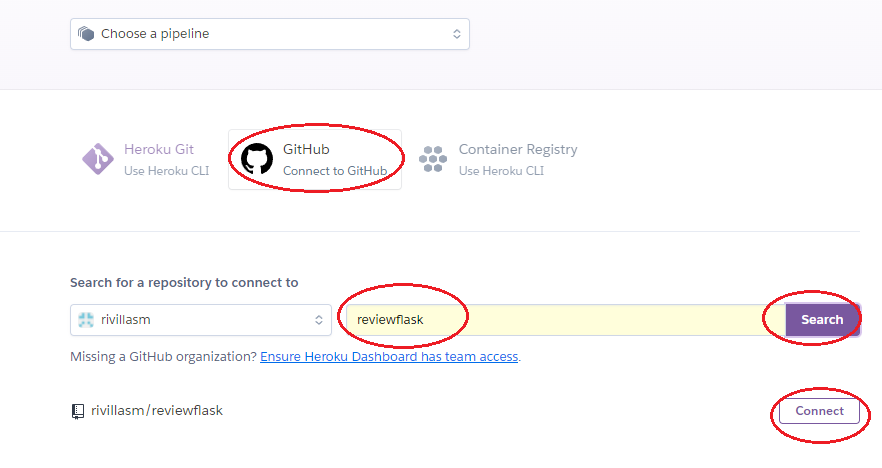

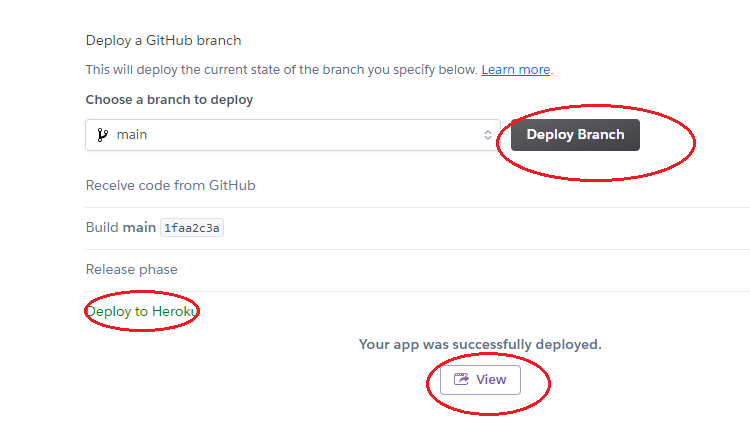

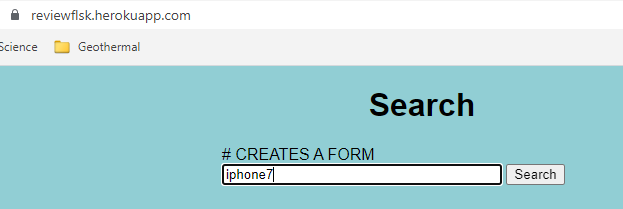

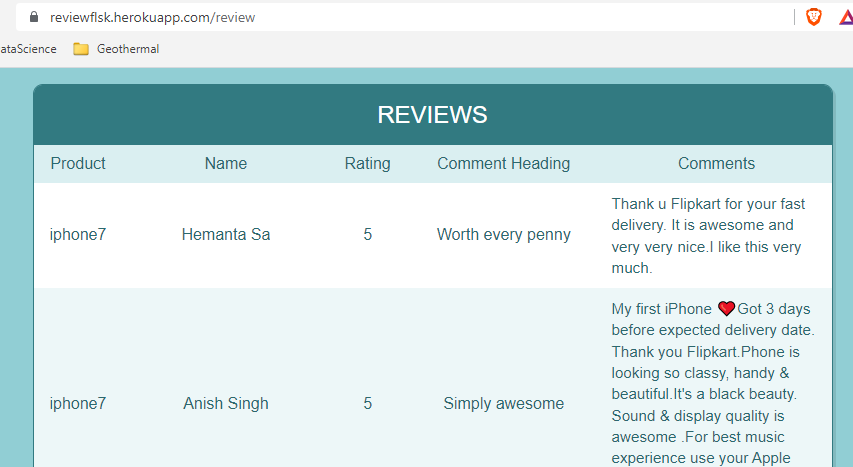

# AWS

* login into aws :  https://aws.amazon.com/console/

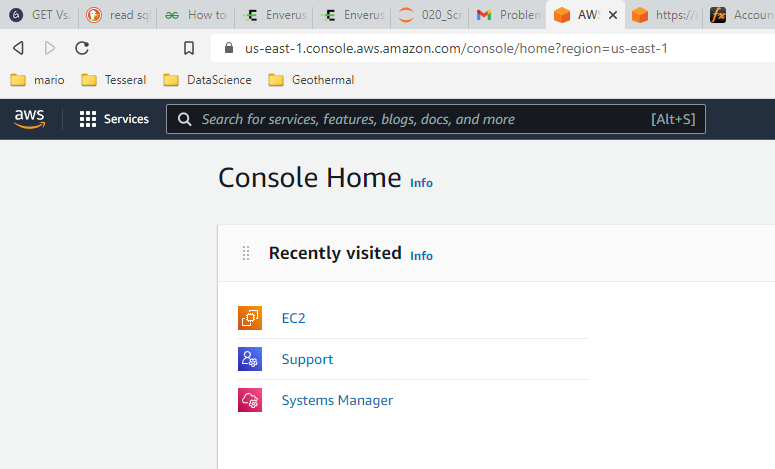


* search for elastic beanstalk

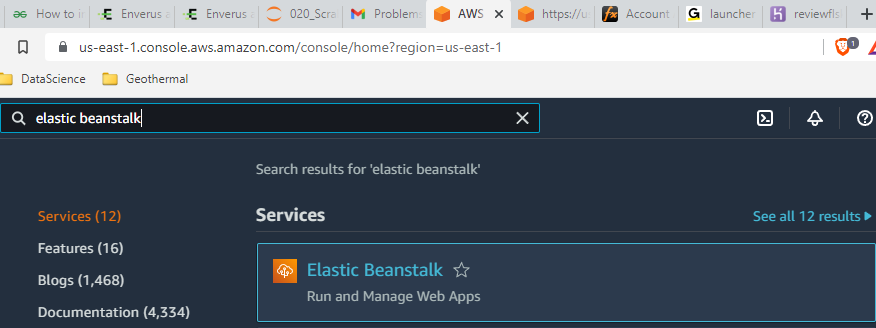

* Create application

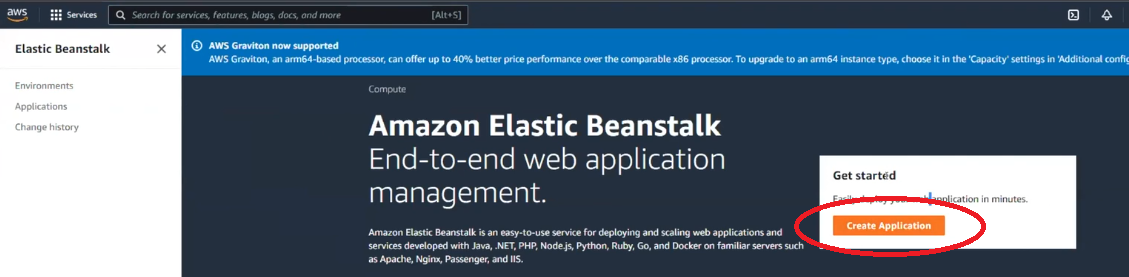

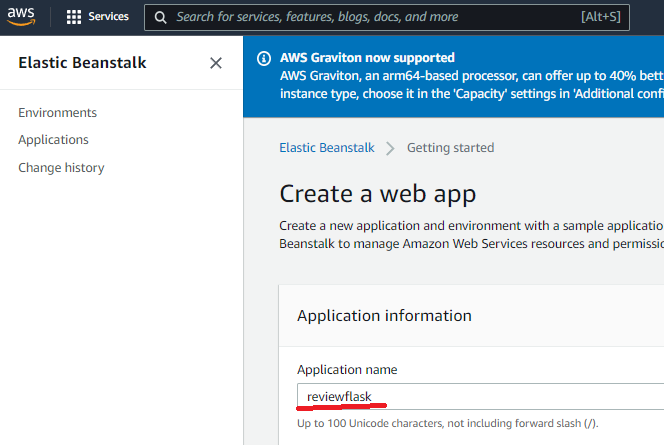

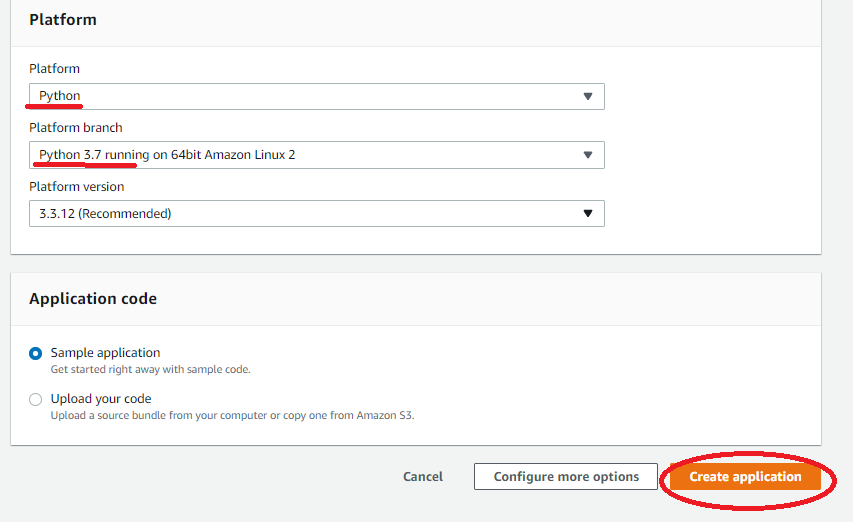

* open a new console and look for code pipeline, you need to create a pipeline to connect python and aws

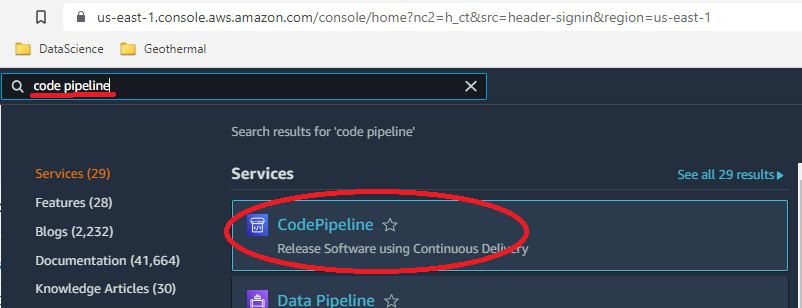

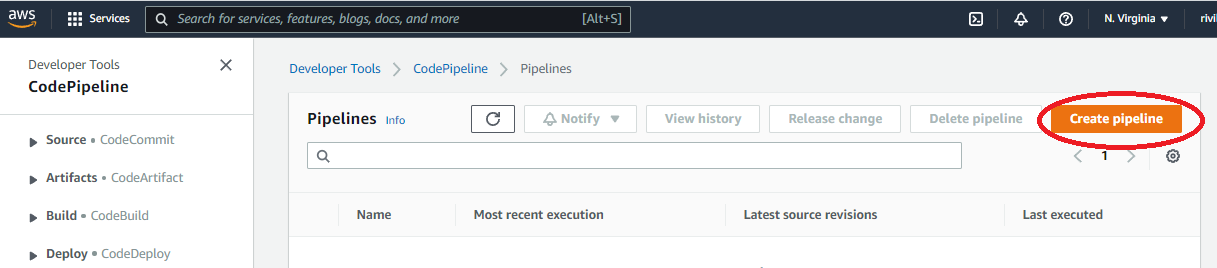

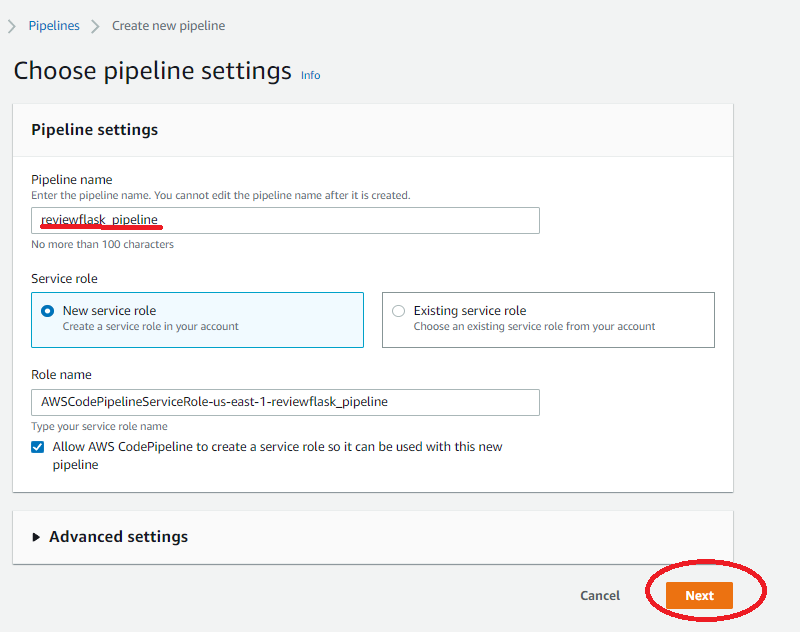

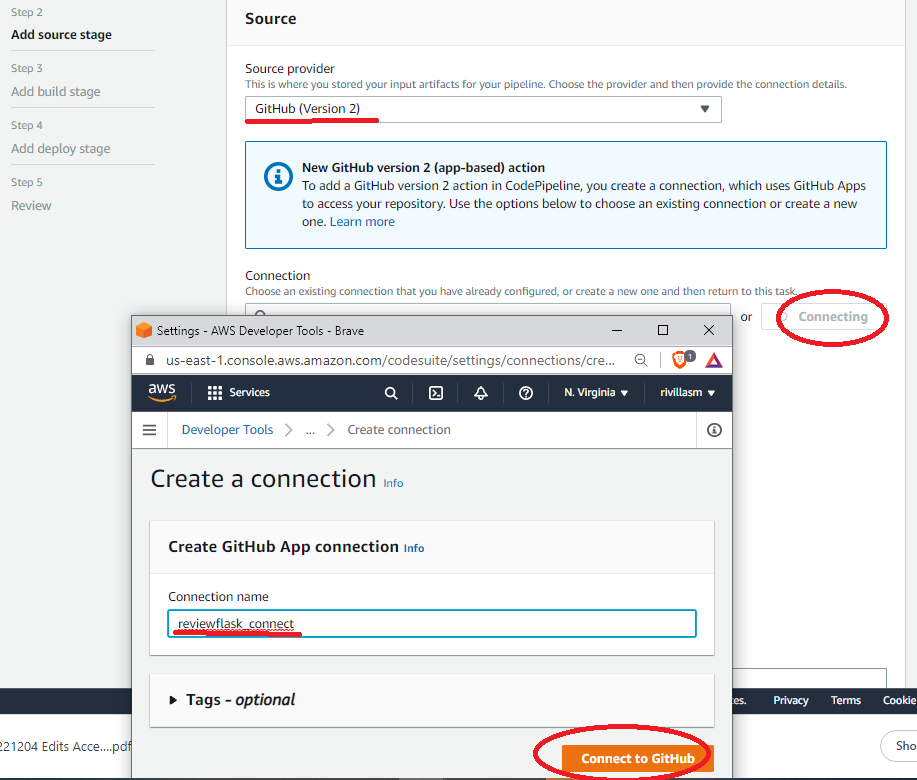

* install a new app, this will connect your github to the aws 

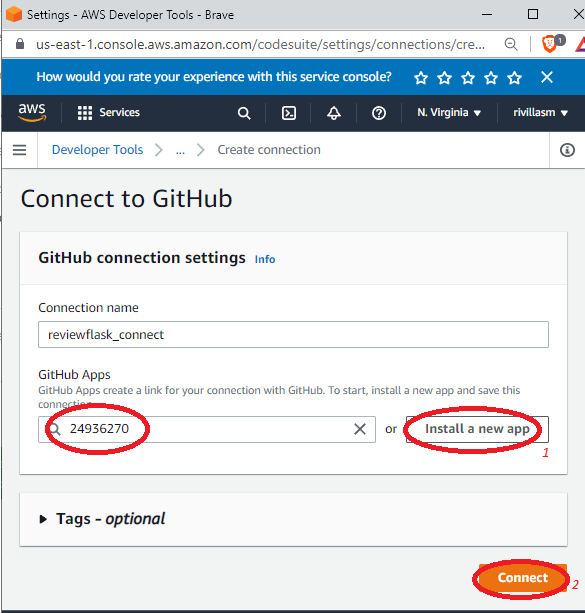

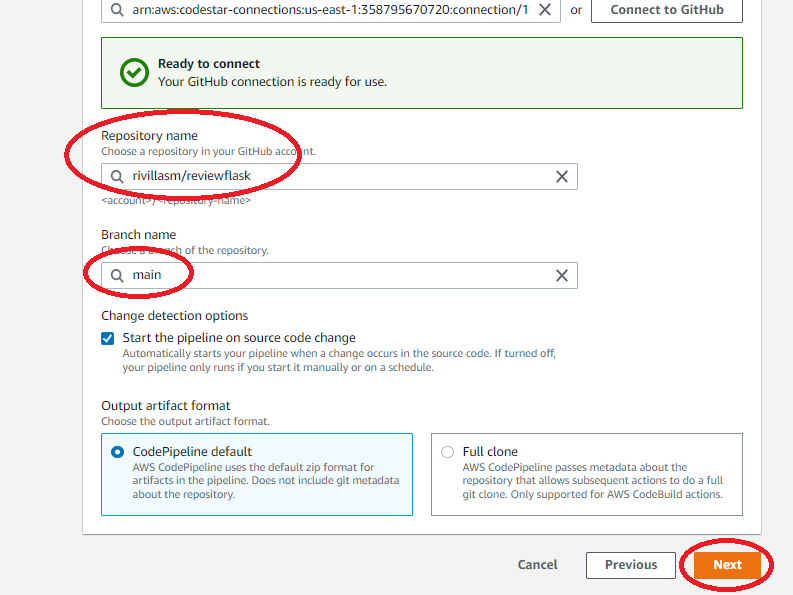

# TASK

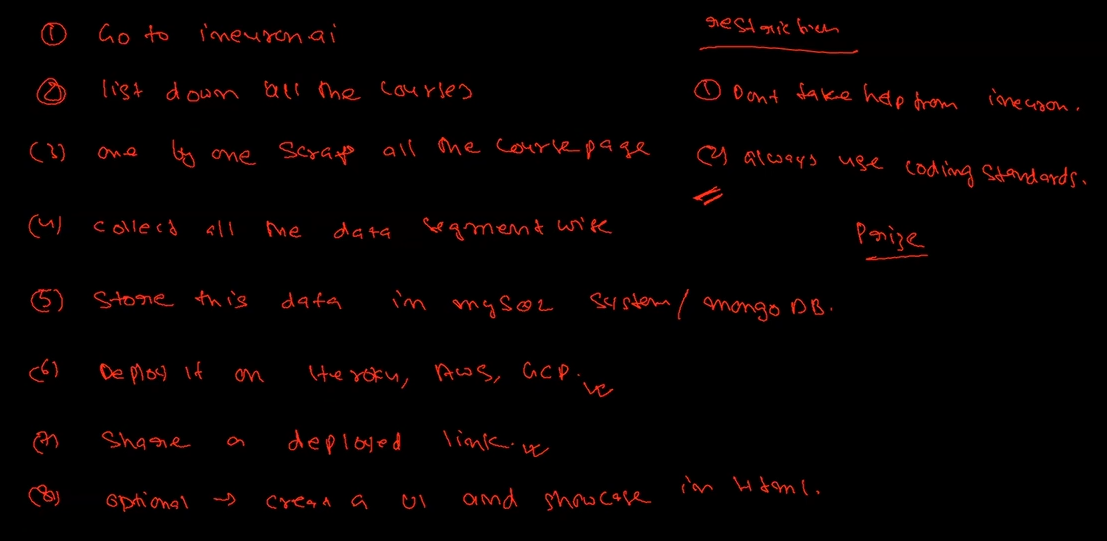